<a href="https://colab.research.google.com/github/alvinato16/prediksi_pesanan_makanan_online/blob/main/predikisi_pesanan_makanan_online%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [16]:
df = pd.read_csv('onlinefoods.csv')
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [17]:
df = df.drop(['Unnamed: 12'], axis=1)
df['Gender'] = df["Gender"].map({"Male": 1, "Female": 0})
df['Marital Status'] = df['Marital Status'].map({'Prefer not to say': 0, 'Single': 1, 'Married': 2})
df['Occupation'] = df['Occupation'].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})

In [18]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Output', 'latitude', 'longitude', 'Pin code'], axis=1)
y = df['Output']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=123)



In [20]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8974358974358975

In [21]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi

from sklearn.metrics import accuracy_score

y_pred =  model.predict(xtest)

accuracy_score =round(accuracy_score(y_pred, ytest), 3)

print('Accuracy: ',accuracy_score)

Accuracy:  0.897


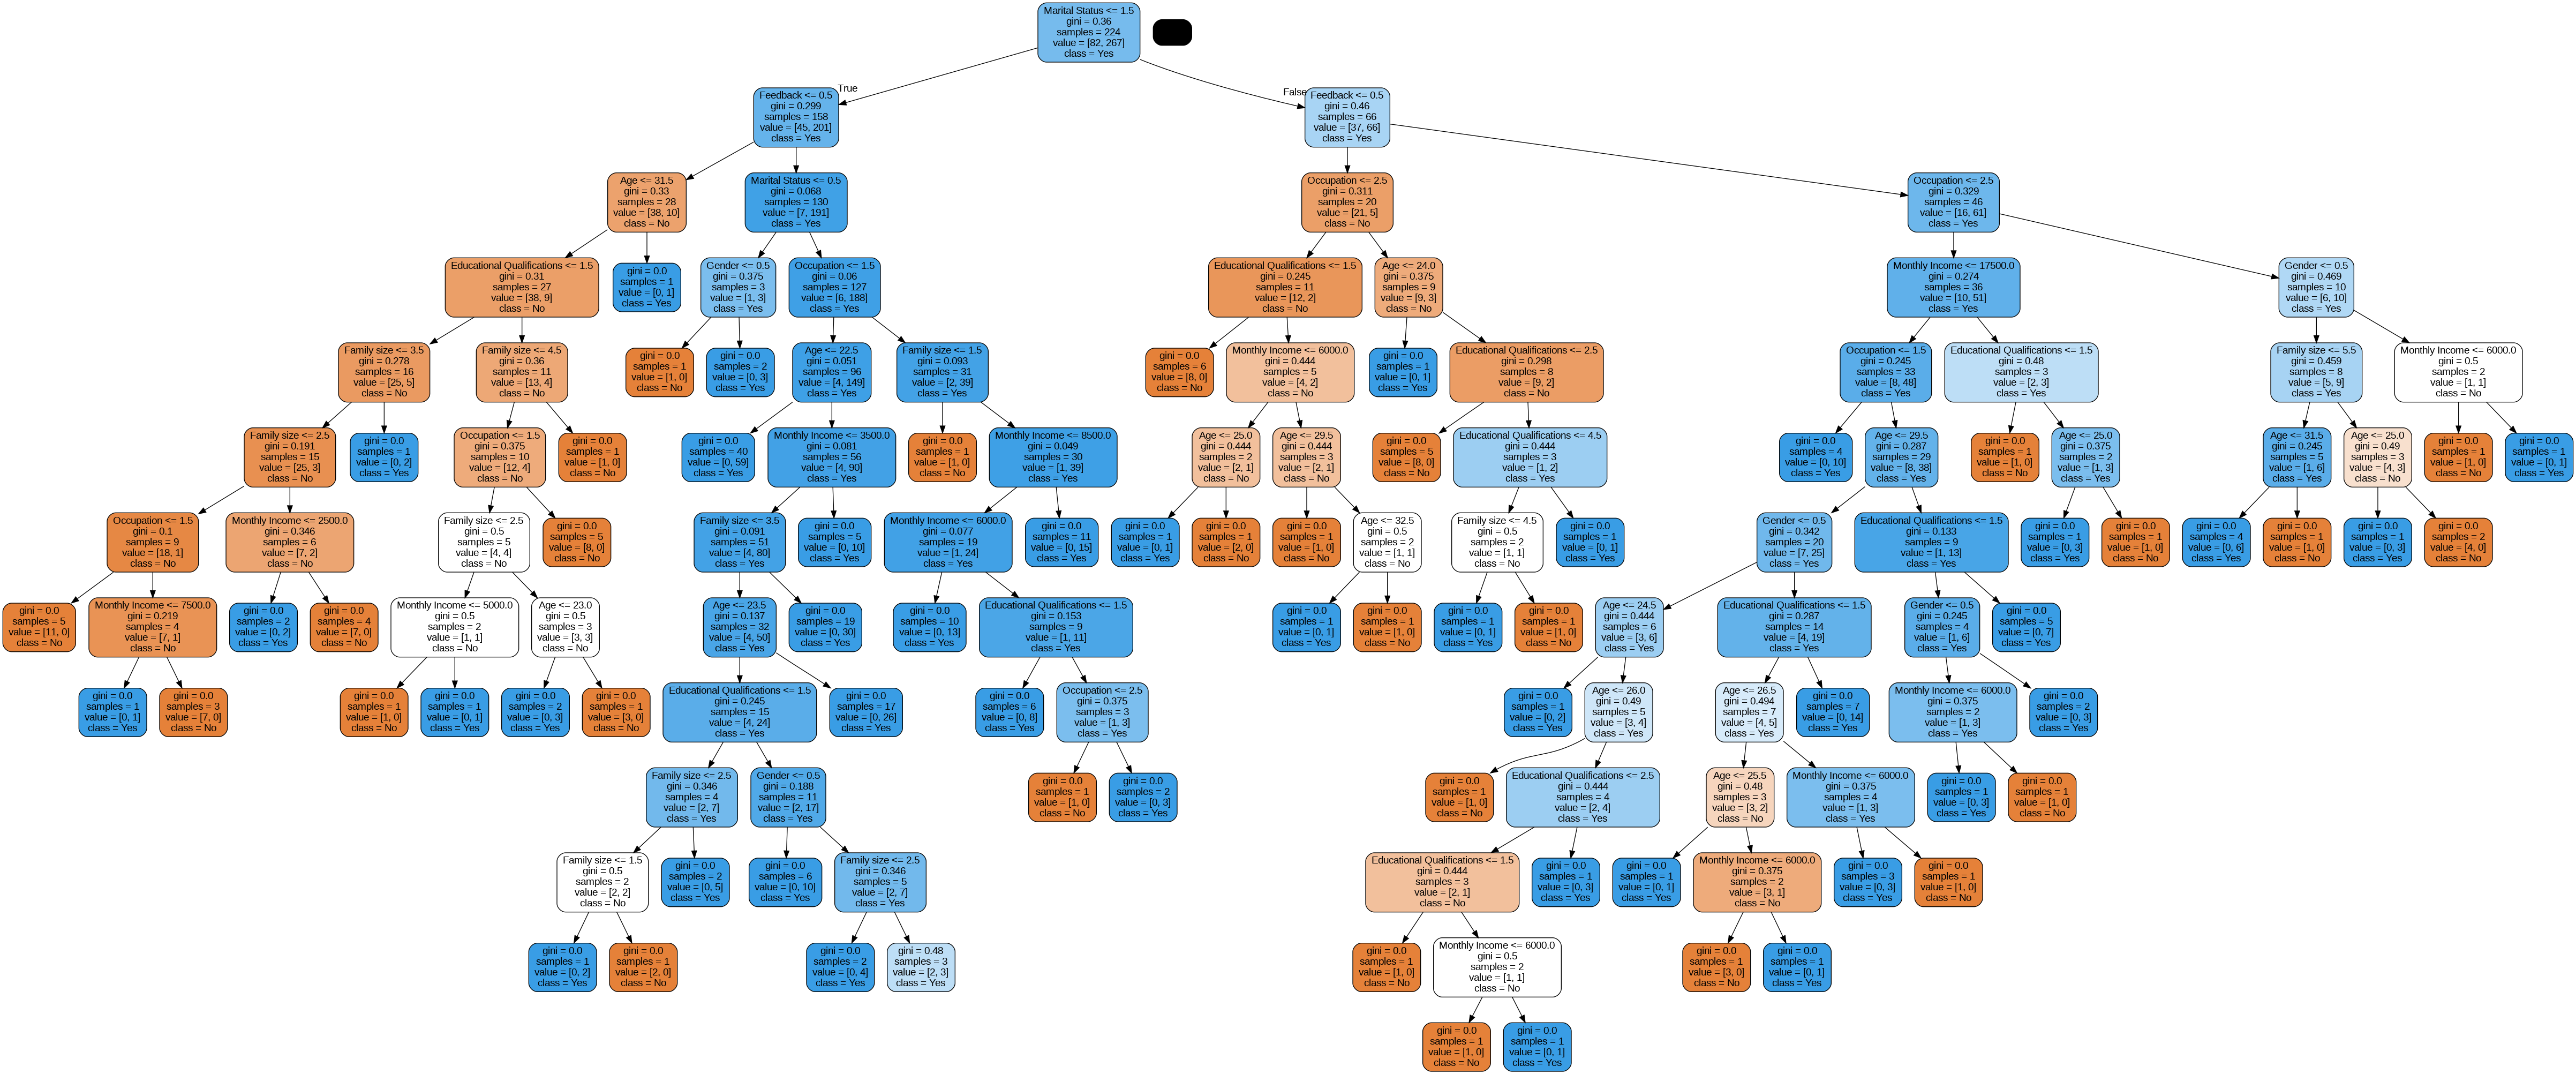

In [22]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Mengambil estimator pertama dari model RandomForestClassifier
estimator = model.estimators_[0]

# Mengekspor pohon keputusan ke format DOT
export_graphviz(estimator,
                out_file="random_forest_tree.dot",
                feature_names=X.columns,
                class_names=model.classes_,
                rounded=True,
                filled=True)

# Mengonversi file DOT menjadi format gambar
graph = pydotplus.graph_from_dot_file("random_forest_tree.dot")
Image(graph.create_png())


keterangan

Gender: "Male" = 1 dan "Female" = 0.

Marital Status: "Prefer not to say" = 0, "Single" = 1, dan "Married" = 2.

Occupation:  "Student" = 1, "Employee" = 2, "Self Employeed" = 3, dan "House wife" = 4.

Educational Qualifications:  "Graduate" = 1, "Post Graduate" = 2, "Ph.D" = 3, "School" = 4, dan "Uneducated" = 5.

Monthly Income:  "No Income" = 0, "25001 to 50000" = 5000, "More than 50000" = 7000, "10001 to 25000" = 25000, dan "Below Rs.10000" = 10000.

Feedback:  "Positive" = 1, dan "Negative " (dengan spasi) = 0.


petunjuk pengisis=an model [age, gender, martial status, occupation, monthly income, educational qualification, family size, feedback]

In [25]:
model.predict([[21, 1, 1, 1, 5000, 1, 3, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [17]:
model.predict([[21, 1, 1, 1, 0, 1, 1, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)